# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [121]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [122]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [123]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tubarjal
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | san diego de la union
Processing Record 12 of Set 1 | hayma'
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | topolobampo
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | gadzhiyevo
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | lata
Processing Record 22 of S

Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | gizo
Processing Record 42 of Set 4 | paramonga
Processing Record 43 of Set 4 | kone
Processing Record 44 of Set 4 | qamdo
Processing Record 45 of Set 4 | dhuburi
Processing Record 46 of Set 4 | kasaragod
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | grand-lahou
Processing Record 0 of Set 5 | cabcaben
Processing Record 1 of Set 5 | kermit
Processing Record 2 of Set 5 | lazaro cardenas
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | sao vicente
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | novaya igirma
Processing Record 7 of Set 5 | kochubey
Processing Record 8 of Set 5 | yagry
City not found. Skipping...
Processing Record 9 of Set 5 | ambatofinandrahana
Processing Record 10 of Set 5 | banfora
Processing Record 11 of Set 5 | la ronge
Processing Record 12 of Set 5 | tchintabaraden
Processing Record 13 of Set 5 

Processing Record 31 of Set 8 | allapalli
Processing Record 32 of Set 8 | bratsk
Processing Record 33 of Set 8 | mogocha
Processing Record 34 of Set 8 | mount pearl
Processing Record 35 of Set 8 | arteche
Processing Record 36 of Set 8 | east rochester
Processing Record 37 of Set 8 | mizdah
Processing Record 38 of Set 8 | lobujya
Processing Record 39 of Set 8 | pemangkat
Processing Record 40 of Set 8 | international falls
Processing Record 41 of Set 8 | flying fish cove
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | parepare
City not found. Skipping...
Processing Record 44 of Set 8 | tobruk
Processing Record 45 of Set 8 | saint-felicien
Processing Record 46 of Set 8 | playarrica
City not found. Skipping...
Processing Record 47 of Set 8 | crescent city
Processing Record 48 of Set 8 | ad dana
Processing Record 49 of Set 8 | el calafate
Processing Record 0 of Set 9 | tugulym
Processing Record 1 of Set 9 | tidjikja
Processing Record 2 of Set 9 | jalai nur
Processi

Processing Record 15 of Set 12 | bouafle
Processing Record 16 of Set 12 | shiqian
Processing Record 17 of Set 12 | oskaloosa
Processing Record 18 of Set 12 | bowling green
Processing Record 19 of Set 12 | bardai
Processing Record 20 of Set 12 | bunia
Processing Record 21 of Set 12 | bam
Processing Record 22 of Set 12 | chul'man
Processing Record 23 of Set 12 | belo sur tsiribihina
Processing Record 24 of Set 12 | pachino
Processing Record 25 of Set 12 | omutinskiy
Processing Record 26 of Set 12 | skowhegan
Processing Record 27 of Set 12 | zomba
Processing Record 28 of Set 12 | skovorodino
Processing Record 29 of Set 12 | brisas de zicatela
Processing Record 30 of Set 12 | posto fiscal rolim de moura
Processing Record 31 of Set 12 | magistral'nyy
Processing Record 32 of Set 12 | dubti
Processing Record 33 of Set 12 | ontario
Processing Record 34 of Set 12 | port-vila
Processing Record 35 of Set 12 | saldanha
Processing Record 36 of Set 12 | cable beach
City not found. Skipping...
Proces

In [124]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [125]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,298.47,69,27,7.19,YE,1701463667
1,avarua,-21.2078,-159.7750,300.18,86,100,8.23,CK,1701463667
2,blackmans bay,-43.0167,147.3167,285.78,90,100,1.07,AU,1701463668
3,waitangi,-43.9535,-176.5597,286.38,72,46,2.24,NZ,1701463668
4,weno,7.4515,151.8468,300.12,89,75,1.54,FM,1701463668


In [126]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [127]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,298.47,69,27,7.19,YE,1701463667
1,avarua,-21.2078,-159.7750,300.18,86,100,8.23,CK,1701463667
2,blackmans bay,-43.0167,147.3167,285.78,90,100,1.07,AU,1701463668
3,waitangi,-43.9535,-176.5597,286.38,72,46,2.24,NZ,1701463668
4,weno,7.4515,151.8468,300.12,89,75,1.54,FM,1701463668


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

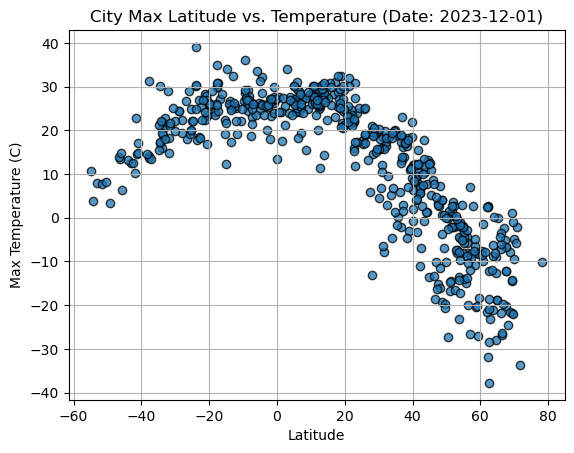

In [128]:
from datetime import datetime

# Get the current date in the specified format
current_date = datetime.utcfromtimestamp(city_data_df["Date"].max()).strftime('%Y-%m-%d')

# Convert Kelvin to Celsius for Max Temp
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (Date: {current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

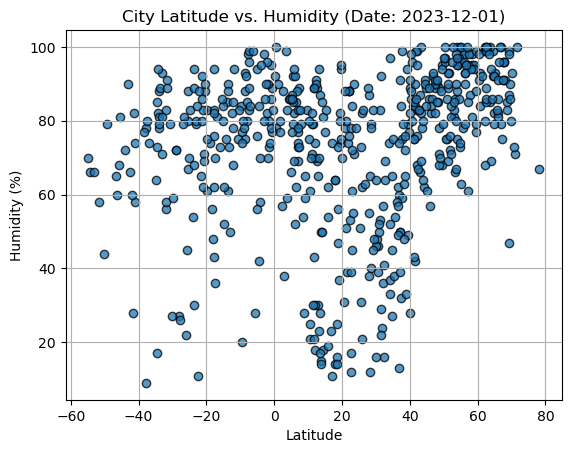

In [129]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (Date: {current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

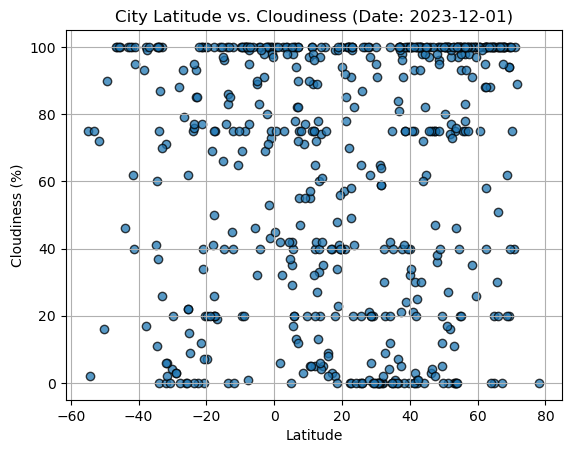

In [130]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (Date: {current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

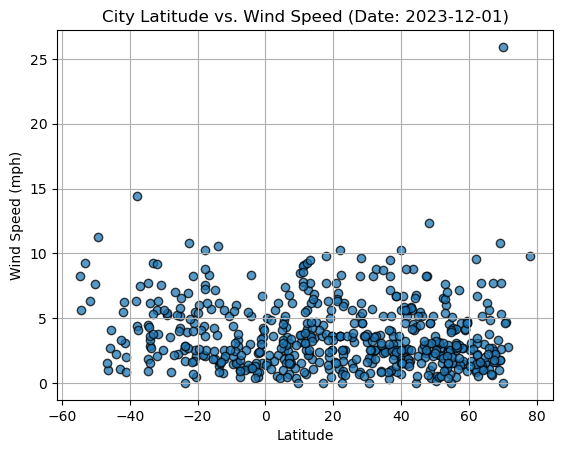

In [131]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (Date: {current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [132]:
# Convert Kelvin to Fahrenheit for Max Temp
city_data_df["Max Temp (F)"] = (city_data_df["Max Temp"] - 273.15) * 9/5 + 32

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set title and labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C),Max Temp (F)
City_ID,,,,,,,,,,,
0,hadibu,12.6500,54.0333,298.47,69,27,7.19,YE,1701463667,25.32,77.576
4,weno,7.4515,151.8468,300.12,89,75,1.54,FM,1701463668,26.97,80.546
5,aasiaat,68.7098,-52.8699,265.29,85,62,3.35,GL,1701463668,-7.86,17.852
8,tubarjal,30.4999,38.2160,288.85,46,0,3.52,SA,1701463669,15.70,60.260
9,whitehorse,60.7161,-135.0538,263.20,84,75,3.09,CA,1701463669,-9.95,14.090


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C),Max Temp (F)
City_ID,,,,,,,,,,,
1,avarua,-21.2078,-159.7750,300.18,86,100,8.23,CK,1701463667,27.03,80.654
2,blackmans bay,-43.0167,147.3167,285.78,90,100,1.07,AU,1701463668,12.63,54.734
3,waitangi,-43.9535,-176.5597,286.38,72,46,2.24,NZ,1701463668,13.23,55.814
6,port mathurin,-19.6833,63.4167,298.73,83,7,5.99,MU,1701463668,25.58,78.044
7,ushuaia,-54.8000,-68.3000,283.94,70,75,8.23,AR,1701463669,10.79,51.422


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7634349539256006


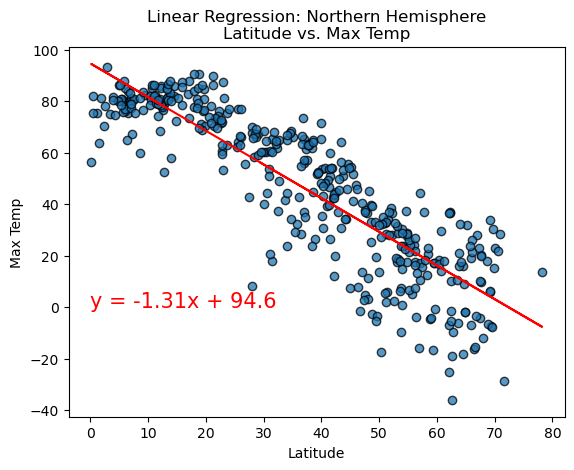

In [135]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (F)"], 
                       "Linear Regression: Northern Hemisphere\nLatitude vs. Max Temp", 
                       "Max Temp", (0, 0))

The r-squared is: 0.452804196364326


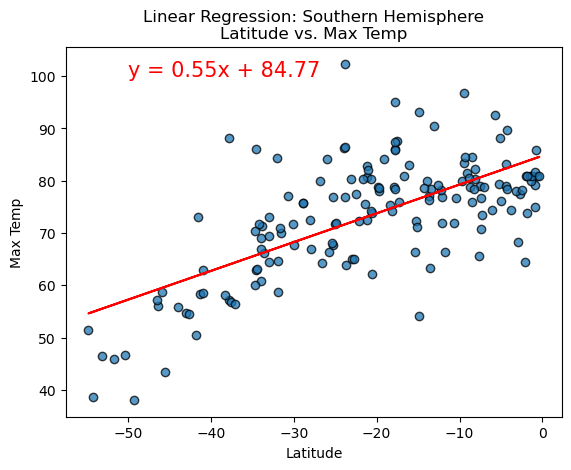

In [136]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (F)"], 
                       "Linear Regression: Southern Hemisphere\nLatitude vs. Max Temp", 
                       "Max Temp", (-50, 100))

**Discussion about the linear relationship:** In the northern hemisphere the higher the latitude the lower the max temperature. In the southern hemisphere the higher the latitude the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16480662302483898


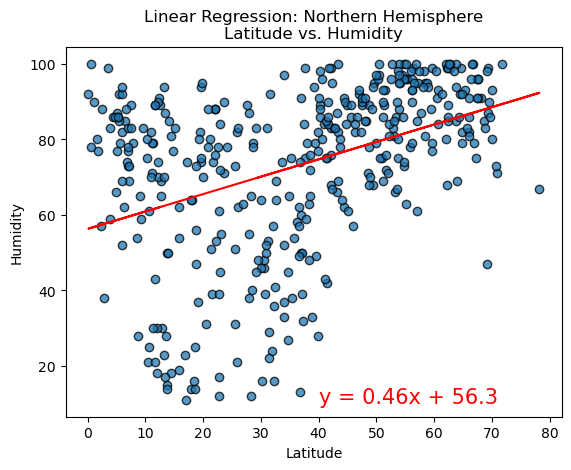

In [137]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                                     "Linear Regression: Northern Hemisphere\nLatitude vs. Humidity", 
                                     "Humidity", (40, 10))

The r-squared is: 0.06407943762533151


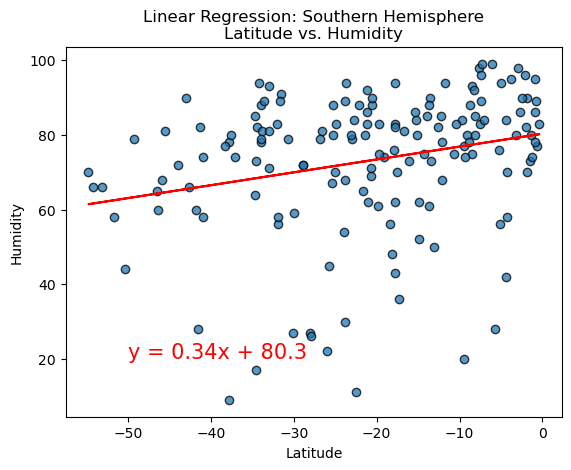

In [147]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                                     "Linear Regression: Southern Hemisphere\nLatitude vs. Humidity", 
                                     "Humidity", (-50, 20))

**Discussion about the linear relationship:**  In the northern hemisphere the higher the latitude the higher the humidity. In the southern hemisphere the higher the latitude the higher the humidity. But overall less correlation then temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04304980768506429


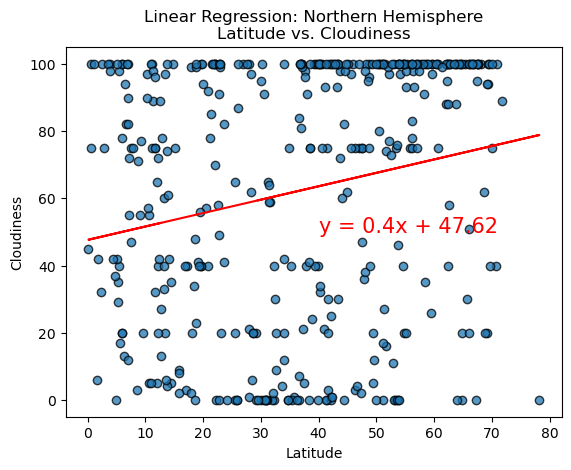

In [139]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                                     "Linear Regression: Northern Hemisphere\nLatitude vs. Cloudiness", 
                                     "Cloudiness", (40, 50))

The r-squared is: 0.027831841375323206


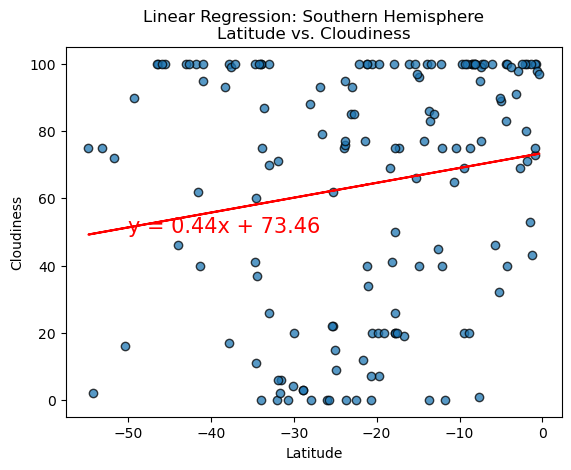

In [140]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                                     "Linear Regression: Southern Hemisphere\nLatitude vs. Cloudiness", 
                                     "Cloudiness", (-50, 50))

**Discussion about the linear relationship:** In the northern hemisphere the higher the latitude the higher the cloudiness, but gernerally not effected by the latitude. In the southern hemisphere the higher the latitude the higher the cloudiness, but gernerally not effected by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001704883484566829


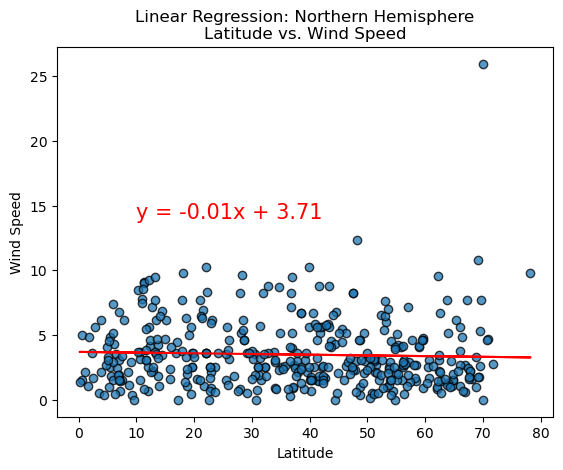

In [144]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                                     "Linear Regression: Northern Hemisphere\nLatitude vs. Wind Speed", 
                                     "Wind Speed", (10, 14))

The r-squared is: 0.10176841604784127


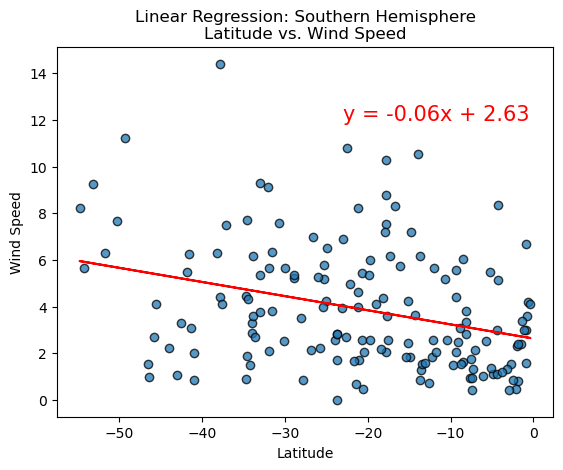

In [146]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                                     "Linear Regression: Southern Hemisphere\nLatitude vs. Wind Speed", 
                                     "Wind Speed", (-23, 12))

**Discussion about the linear relationship:** In the northern hemisphere wind speed practically not effected by the latitude. In the southern hemisphere the wind spead slightly decreases as the latitude increases.